## 导入包，加载文件

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import xgboost

In [459]:
raw_train_data=pd.read_csv('./input/train.csv',index_col=0)
raw_test_data=pd.read_csv('./input/test.csv',index_col=0)

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [3]:
## 顺便查看下
raw_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 数据预处理

    1、对于train数据，将特征和label分离。
    2、去除无用的特征

In [5]:
# 姓名应该是不要的，所以这里把姓名去掉~
del_na_train_data=raw_train_data.drop('Name',axis=1)
del_na_test_data=raw_test_data.drop('Name',axis=1)
del_na_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 特征和label分离
fet_train_data=del_na_train_data.drop('Survived',axis=1)
lab_train_data=pd.DataFrame(index=del_na_train_data.index,data={'Survived':del_na_train_data['Survived']})

In [7]:
print(fet_train_data.head())

             Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
PassengerId                                                                  
1                 3    male  22.0      1      0         A/5 21171   7.2500   
2                 1  female  38.0      1      0          PC 17599  71.2833   
3                 3  female  26.0      0      0  STON/O2. 3101282   7.9250   
4                 1  female  35.0      1      0            113803  53.1000   
5                 3    male  35.0      0      0            373450   8.0500   

            Cabin Embarked  
PassengerId                 
1             NaN        S  
2             C85        C  
3             NaN        S  
4            C123        S  
5             NaN        S  


In [8]:
print(lab_train_data.head())

             Survived
PassengerId          
1                   0
2                   1
3                   1
4                   1
5                   0


## 简单查看一下特征和label之间关系

In [13]:
fet_train_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

### embark和存活与否的关系

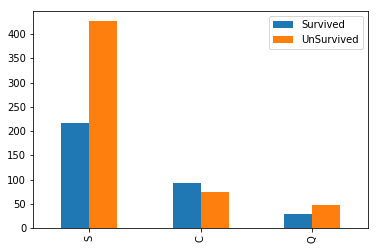

In [20]:
%matplotlib inline
fig=plt.figure()

# 新建一个datafram来画图
Survived_Y=fet_train_data.Embarked[lab_train_data.Survived==1].value_counts()
Survived_N=fet_train_data.Embarked[lab_train_data.Survived==0].value_counts()

embark_sur_df=pd.DataFrame(data={'Survived':Survived_Y,'UnSurvived':Survived_N})

embark_sur_df.plot(kind='bar')

### 性别和存活与否的关系

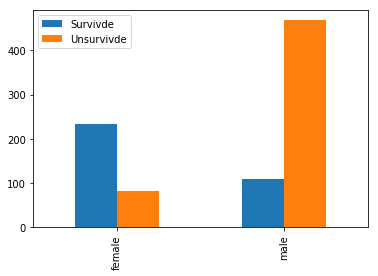

In [24]:
sur_sex=fet_train_data.Sex[lab_train_data.Survived==1].value_counts()
uns_sex=fet_train_data.Sex[lab_train_data.Survived==0].value_counts()

sex_df=pd.DataFrame(data={'Survivde':sur_sex,'Unsurvivde':uns_sex})

sex_df.plot(kind='bar')

### 船舱等级和存活与否的关系

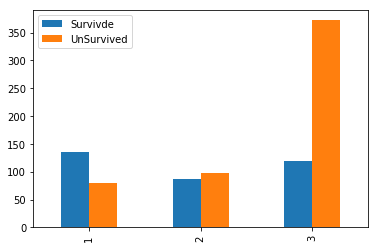

In [27]:
sur_pclass=fet_train_data.Pclass[lab_train_data.Survived==1].value_counts()
uns_pclass=fet_train_data.Pclass[lab_train_data.Survived==0].value_counts()

pc_df=pd.DataFrame(data={'Survivde':sur_pclass,'UnSurvived':uns_pclass})

pc_df.plot(kind='bar')

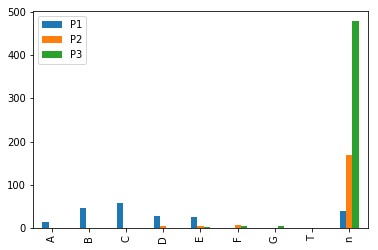

In [36]:
## 想看一眼船舱等级和cabin之间的关系
cab_p1=fet_train_data.Cabin[fet_train_data.Pclass==1]
cab_p1=pd.Series(np.array([str(ca)[0] for ca in cab_p1]))
c1=cab_p1.value_counts()

cab_p2=fet_train_data.Cabin[fet_train_data.Pclass==2]
cab_p2=pd.Series(np.array([str(ca)[0] for ca in cab_p2]))
c2=cab_p2.value_counts()

cab_p3=fet_train_data.Cabin[fet_train_data.Pclass==3]
cab_p3=pd.Series(np.array([str(ca)[0] for ca in cab_p3]))
c3=cab_p3.value_counts()

c_p_df=pd.DataFrame(data={'P1':c1,'P2':c2,'P3':c3})
c_p_df.plot(kind='bar')

In [40]:
fet_train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
fet_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 109.6+ KB


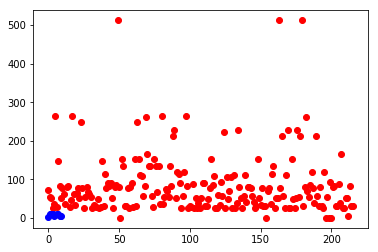

In [71]:
pclass_fate=fet_train_data.Fare[fet_train_data.Pclass==1]
y=np.array([random.uniform(1,10) for _ in range(10)])
x=np.array([i for i in range(10)])
plt.plot([i for i in range(len(pclass_fate))],pclass_fate,'ro')
plt.show()

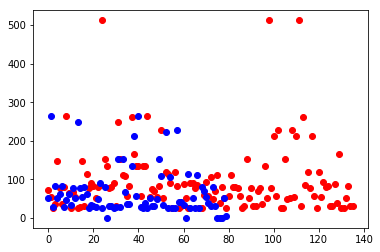

In [79]:
sur_pclass=fet_train_data.Fare[(fet_train_data.Pclass==1) & (lab_train_data.Survived==1)]
uns_pclass=fet_train_data.Fare[(fet_train_data.Pclass==1) & (lab_train_data.Survived==0)]

plt.plot([i for i in range(len(sur_pclass))],sur_pclass,'ro')
plt.plot([i for i in range(len(uns_pclass))],uns_pclass,'bo')


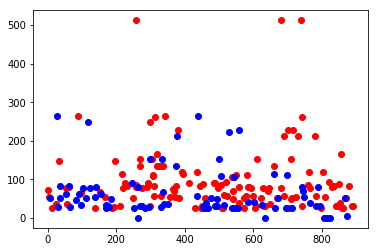

In [90]:
sur_pclass_all=fet_train_data[(fet_train_data.Pclass==1) & (lab_train_data.Survived==1)]
x_sur=np.array(sur_pclass_all.index)
x_sur=list(x_sur)
plt.plot(x_sur,sur_pclass_all.Fare,'ro')

uns_pclass_all=fet_train_data[(fet_train_data.Pclass==1) & (lab_train_data.Survived==0)]
x_uns=np.array(uns_pclass_all.index)
x_uns=list(x_uns)
plt.plot(x_uns,uns_pclass_all.Fare,'bo')

## 特征处理
    
    1、对于非数值型的数据，我们需要将其进行one_hot编码，才能够进行下一部分分析。
    2、非数值型，表示从含义上，我们判断它是category的，比如PClass这个特征，虽然他用1，2，3表示，但它实际上是一个category类型的特征啊~~

In [96]:
'''
    将train——data的feature部分和test数据结合在一起，进行下面的预处理
'''
raw_all_data=pd.concat([fet_train_data,del_na_test_data])
print(raw_all_data.head())
print(raw_all_data.info())

             Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
PassengerId                                                                  
1                 3    male  22.0      1      0         A/5 21171   7.2500   
2                 1  female  38.0      1      0          PC 17599  71.2833   
3                 3  female  26.0      0      0  STON/O2. 3101282   7.9250   
4                 1  female  35.0      1      0            113803  53.1000   
5                 3    male  35.0      0      0            373450   8.0500   

            Cabin Embarked  
PassengerId                 
1             NaN        S  
2             C85        C  
3             NaN        S  
4            C123        S  
5             NaN        S  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1

### 特征查看
  
    我们需要看一下特征是否有nan等不合理的数据

In [97]:
'''
    我们发现，age，fare，cabin，Embarked有数据缺失。
'''
print('shape of data: ',raw_all_data.shape)
print(raw_all_data.info())

shape of data:  (1309, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB
None


In [98]:
'''
    简单看一下统计信息:
        这里只会显示用数字表示的特征
'''
print(raw_all_data.describe())

            Pclass          Age        SibSp        Parch         Fare
count  1309.000000  1046.000000  1309.000000  1309.000000  1308.000000
mean      2.294882    29.881138     0.498854     0.385027    33.295479
std       0.837836    14.413493     1.041658     0.865560    51.758668
min       1.000000     0.170000     0.000000     0.000000     0.000000
25%       2.000000    21.000000     0.000000     0.000000     7.895800
50%       3.000000    28.000000     0.000000     0.000000    14.454200
75%       3.000000    39.000000     1.000000     0.000000    31.275000
max       3.000000    80.000000     8.000000     9.000000   512.329200


### Nan数据填充

#### Fare中Nan数据填充

    fare特征中有一个nan缺失，这里我们准备用它的均值来进行填充

In [99]:
raw_all_data.Fare=raw_all_data.Fare.fillna(raw_all_data.Fare.mean())
print(raw_all_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB
None


#### Age中Nan数据填充

age数据我们理解为是一个category类型的数据，并且其中包含有一些nan值。

对于nan值的处理方法比较多，这里选择填充的办法进行处理。

但是，这里的age虽然表示category的特征，但本身是数值型的，取均值填充什么的不太好，那么我们通过拟合的方式选择：

    1、将数据按照有年龄（不是nan）和没有年龄（是nan）分成两部分A，B。
    
    2、对于A部分，我们将年龄作为label，其他值作为样本，训练一个model出来。这里选择使用randomforest。
    
    3、对于B部分，我们将其认为是测试数据，利用训练好的模型，取计算每个样本的年龄。
    
    4、这里，我们把它看看做是一个regressor问题。

In [100]:
# 将age为nan的数据和不为nan的数据分开
age_not_data=raw_all_data[pd.notnull(raw_all_data.Age)]
print(age_not_data.info())
print('----')
age_nul_data=raw_all_data[pd.isnull(raw_all_data.Age)]
print(age_nul_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1307
Data columns (total 9 columns):
Pclass      1046 non-null int64
Sex         1046 non-null object
Age         1046 non-null float64
SibSp       1046 non-null int64
Parch       1046 non-null int64
Ticket      1046 non-null object
Fare        1046 non-null float64
Cabin       272 non-null object
Embarked    1044 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 81.7+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 6 to 1309
Data columns (total 9 columns):
Pclass      263 non-null int64
Sex         263 non-null object
Age         0 non-null float64
SibSp       263 non-null int64
Parch       263 non-null int64
Ticket      263 non-null object
Fare        263 non-null float64
Cabin       23 non-null object
Embarked    263 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 20.5+ KB
None


In [101]:
'''
   从训练样本：age_not_data中分离出label和特征
   这里我们只选择'Fare', 'Parch', 'SibSp', 'Pclass'，来作为特征
'''
age_lab_y=age_not_data.Age
age_fet_x=age_not_data[['Fare', 'Parch', 'SibSp', 'Pclass']]
print(age_fet_x.shape)
print(age_lab_y.shape)

(1046, 4)
(1046,)


In [102]:
'''
    搭建模型，这里用一个randomforest
'''
from sklearn.ensemble import RandomForestRegressor
# 获取模型
model=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
# 开始训练
print(age_fet_x.info())
model.fit(age_fet_x,age_lab_y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 1 to 1307
Data columns (total 4 columns):
Fare      1046 non-null float64
Parch     1046 non-null int64
SibSp     1046 non-null int64
Pclass    1046 non-null int64
dtypes: float64(1), int64(3)
memory usage: 40.9 KB
None


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [103]:
'''
    预测并替代
'''
predicted_age=model.predict(age_nul_data[['Fare', 'Parch', 'SibSp', 'Pclass']])
print(predicted_age[:10])
print(type(predicted_age))
# 复制一份原始的，没有分割过label和features的数据
age_right_data=raw_all_data.copy()
# 对age_right_data的这个dataframe，通过raw_all_data来确定需要被替换的index，然后用predicted_age来替换。
age_right_data.loc[raw_all_data.Age.isnull(),'Age']=predicted_age

[23.67671451 32.21676405 27.87327022 27.87327022 22.57408282 27.88329979
 49.2984675  32.72008315 23.64033133 27.88329979]
<class 'numpy.ndarray'>


In [104]:
'''
    查看一眼数据
'''
age_right_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 9 columns):
Pclass      1309 non-null int64
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


### 对Category数据做one-hot编码

In [105]:
'''
    我们发现cabin数据有很多是缺失的；
    而且从内容上看，比较难进行补充，因此我们把确属的数据作为一个单独的类进行处理。
    这里引出了对于有缺失特征的几个做法：
      0、当样本数目很大，而缺失数量非常少，而缺失特征很重要时，可以干脆删了这个样本。
      1、当缺失的数量比较少时，可以采用均值，或者邻近值填充。
      2、当缺失的数量中等时，可以尝试采用预测的方法进行填充。
      3、当缺失的数量很多时，可以干脆将缺失视为一个类别。
      4、当缺失实在太对的时候，尝试将这一列删除
'''
age_right_data.loc[age_right_data.Cabin.isnull(),'Cabin']='No'
age_right_data.Cabin.value_counts().head()

No                 1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
Name: Cabin, dtype: int64

In [106]:
'''
    我们尝试根据仓位首字母进行分类
'''
first_letter_cabin=np.array([ca[0] for ca in age_right_data.Cabin])
age_right_data['Cabin_A']=first_letter_cabin

In [107]:
age_right_data.Cabin_A.value_counts()

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_A, dtype: int64

In [108]:
'''
    不要cabin了，只要cabin的首字母这一列
'''
final_data=age_right_data.drop(['Cabin'],axis=1)
final_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_A
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S,N
2,1,female,38.0,1,0,PC 17599,71.2833,C,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,N
4,1,female,35.0,1,0,113803,53.1000,S,C
5,3,male,35.0,0,0,373450,8.0500,S,N


In [230]:
'''
    对：Pclass，Sex，Embarked，Cabin_A做one-hot
    目前暂时不知道如何使用：ticket这一项，暂时将他丢弃
'''
dumm_Pclass=pd.get_dummies(final_data.Pclass,prefix='Pclass')
dumm_Sex=pd.get_dummies(final_data.Sex,prefix='Sex')
dumm_Embarked=pd.get_dummies(final_data.Embarked,prefix='Embarked')
dumm_Cabin_A=pd.get_dummies(final_data.Cabin_A,prefix='CabinA')

concat_data=final_data.drop(['Ticket','Pclass','Sex','Embarked','Cabin_A'],axis=1)

In [231]:
one_hot_data=pd.concat([concat_data,dumm_Embarked,dumm_Cabin_A,dumm_Pclass,dumm_Sex],axis=1)

In [232]:
one_hot_data.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinA_A,CabinA_B,CabinA_C,...,CabinA_E,CabinA_F,CabinA_G,CabinA_N,CabinA_T,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,38.0,1,0,71.2833,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,26.0,0,0,7.9250,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,35.0,1,0,53.1000,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5,35.0,0,0,8.0500,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


### 对年龄做进一步处理
年龄数据，它的数值意思其实并不大，更多的是在判断一个人属于小孩，青年，壮年还是老年。

In [233]:
one_hot_data.Age.describe()

count    1309.000000
mean       29.869424
std        13.450291
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

In [234]:
# 想看一下年龄和存活与否的关系，需要把training数据拿出来
len(fet_train_data)
one_hot_data_train=one_hot_data[:len(fet_train_data)]

In [235]:
sur_age1=lab_train_data.Survived[one_hot_data_train.Age<1].value_counts()
sur_age2=lab_train_data.Survived[(one_hot_data_train.Age>22) & (one_hot_data_train.Age<=28)].value_counts()
sur_age3=lab_train_data.Survived[(one_hot_data_train.Age>28) & (one_hot_data_train.Age<=37)].value_counts()
sur_age4=lab_train_data.Survived[(one_hot_data_train.Age>37) & (one_hot_data_train.Age<=80)].value_counts()

temp_pd=pd.DataFrame(data={'0~22':sur_age1,'22~28':sur_age2,'28~37':sur_age3,'37~80':sur_age4})
temp_pd

,0~22,22~28,28~37,37~80
0,NaN,121,137,138
1,7.0,68,89,82


In [236]:
age_survive={}
for i in range(0,80):
    temp=lab_train_data.Survived[(one_hot_data_train.Age>i) & (one_hot_data_train.Age<=i+1)].value_counts()
    age_survive[i+1]=temp
    
age_temp_pd=pd.DataFrame(data=age_survive)
age_temp_pd=age_temp_pd.fillna(0)
age_temp_pd

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
0,2,7,1,3,0.0,1,2,2,6,2.0,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,3,5,7,4.0,2,1,2,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


'\n 从图中，我们可以看出的趋势大概是这样：\n     1、在13岁之前，存活率有较大的浮动，主要是从中间值往上浮动。\n     2、在13~55岁之间，存活率在0.5以下分布。\n     3、在55岁之上，存活率开始不是0就是1，而且是0的概率很大。\n 因此，这里我们对age在做一个one-hot：\n     0~13定义为kid\n     13~55定义为man\n     55以上定义为elder\n'

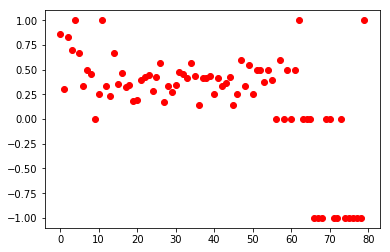

In [237]:
acc_list=[]
for col in age_temp_pd.columns:
    tep_sur=age_temp_pd.loc[1,col]
    tep_uns=age_temp_pd.loc[0,col]
    if tep_sur+tep_uns == 0:
        acc_list.append(-1)
    else:
        acc_list.append(tep_sur/(tep_sur+tep_uns))

plt.plot(range(0,len(acc_list)),acc_list,'ro')
'''
 从图中，我们可以看出的趋势大概是这样：
     1、在13岁之前，存活率有较大的浮动，主要是从中间值往上浮动。
     2、在13~55岁之间，存活率在0.5以下分布。
     3、在55岁之上，存活率开始不是0就是1，而且是0的概率很大。
 因此，这里我们对age在做一个one-hot：
     0~13定义为kid
     13~55定义为man
     55以上定义为elder
'''

In [238]:
# 对年龄按照不同区间做一个分类
age_label=[]
for age in one_hot_data.Age:
    if age <=13:
        age_label.append('kid')
    elif age<=55 and age >13:
        age_label.append('youth')
    elif age>55:
        age_label.append('elder')
one_hot_data['Age_label']=np.array(age_label)

In [242]:
# dummy
dumm_age=pd.get_dummies(one_hot_data.Age_label,prefix='Age')
one_hot_data_all=one_hot_data.drop(['Age','Age_label'],axis=1)

one_hot_data_all=pd.concat([one_hot_data_all,dumm_age],axis=1)

one_hot_data_all.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinA_A,CabinA_B,CabinA_C,CabinA_D,...,CabinA_N,CabinA_T,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_elder,Age_kid,Age_youth
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,0,7.2500,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,1,0,71.2833,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,7.9250,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4,1,0,53.1000,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5,0,0,8.0500,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


### 归一化

其实一直有一个问题，如果这里对数据进行归一化了，然后进行训练拿到模型，

那么对于新进来的样本，我们怎么把它转化到我们要求的范围上呢？

In [243]:
import sklearn.preprocessing as preprocessing

'''
    这里的归一化方法为：(X-mean)/std
'''
scaler = preprocessing.StandardScaler()

# Age归一化
'''
age_scale_parm=scaler.fit(one_hot_data.Age.values.reshape(-1,1))
print(age_scale_parm)
one_hot_data.Age=scaler.fit_transform(one_hot_data.Age.values.reshape(-1,1),age_scale_parm)
'''
# Fare归一化
fare_scale_parm=scaler.fit(one_hot_data_all.Fare.values.reshape(-1,1))
one_hot_data_all.Fare=scaler.fit_transform(one_hot_data_all.Fare.values.reshape(-1,1),fare_scale_parm)


In [244]:
one_hot_data_all.head()

,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,CabinA_A,CabinA_B,CabinA_C,CabinA_D,...,CabinA_N,CabinA_T,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_elder,Age_kid,Age_youth
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,0,-0.503595,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
2,1,0,0.734503,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,-0.490544,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
4,1,0,0.382925,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5,0,0,-0.488127,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1


In [284]:
from sklearn.feature_selection import SelectKBest
from scipy.stats import pearsonr
for_person_data=one_hot_data_all.loc[:len(lab_train_data),:]

result1=pearsonr(for_person_data.SibSp,lab_train_data.Survived)
pear_dict={}
for key in for_person_data.columns:
    temp,temp1=pearsonr(for_person_data.loc[:,key],lab_train_data.Survived)
    pear_dict[key]=temp

print(pear_dict)
pear_pd=pd.DataFrame(data={'features':list(pear_dict.keys()),'pear':list(pear_dict.values())})
pear_pd.sort_values(by='pear')

{'SibSp': -0.03532249888573558, 'Parch': 0.08162940708348349, 'Fare': 0.2573065223849623, 'Embarked_C': 0.1682404312182332, 'Embarked_Q': 0.003650382683972173, 'Embarked_S': -0.15566027340439348, 'CabinA_A': 0.022286953811301816, 'CabinA_B': 0.17509503365047568, 'CabinA_C': 0.11465211543263727, 'CabinA_D': 0.1507156442304826, 'CabinA_E': 0.14532144323642826, 'CabinA_F': 0.05793494702080387, 'CabinA_G': 0.016040182686507542, 'CabinA_N': -0.316911523112296, 'CabinA_T': -0.02645646879696232, 'Pclass_1': 0.28590376778374277, 'Pclass_2': 0.09334857241192886, 'Pclass_3': -0.32230835737297003, 'Sex_female': 0.5433513806577552, 'Sex_male': -0.5433513806577553, 'Age_elder': -0.041166468950899204, 'Age_kid': 0.12297826269262763, 'Age_youth': -0.07681866684798408}


,features,pear
19,Sex_male,-0.543351
17,Pclass_3,-0.322308
13,CabinA_N,-0.316912
5,Embarked_S,-0.155660
22,Age_youth,-0.076819
20,Age_elder,-0.041166
0,SibSp,-0.035322
14,CabinA_T,-0.026456
4,Embarked_Q,0.003650
12,CabinA_G,0.016040


## 建模

### LogisticRegression

In [467]:
# 数据分离
train_size=raw_train_data.shape[0]
train_data=one_hot_data_all.loc[:train_size,:]
test_data=one_hot_data_all.loc[train_size+1:,:]

print(train_data.shape)
print(test_data.shape)
print(lab_train_data.shape)
print(train_data.index)
test_data.index

(891, 23)
(418, 23)
(891, 1)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=891)


Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [468]:
'''
    建模
'''
from sklearn.linear_model import LogisticRegressionCV

model_lr = LogisticRegressionCV(Cs=10,cv=10,scoring='accuracy')
model_lr.fit(train_data,lab_train_data.Survived)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='accuracy', solver='lbfgs', tol=0.0001,
           verbose=0)

In [469]:
predicted=model_lr.predict(test_data)

print(predicted)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 0]


In [470]:
# 看一下每项前面的系数
model_lr.coef_
coef_pd=pd.DataFrame(data={'features':list(train_data.columns),'coef':list(model_lr.coef_.T)})
coef_pd

,coef,features
0,[-0.4977911168314],SibSp
1,[-0.2591592429452084],Parch
2,[0.2283357406633743],Fare
3,[-0.4217177767931973],Embarked_C
4,[-0.44642892611733964],Embarked_Q
5,[-0.9086862123098989],Embarked_S
6,[0.37057674960388287],CabinA_A
7,[0.47731345648610235],CabinA_B
8,[-0.0006311393613463255],CabinA_C
9,[0.9242803557701902],CabinA_D


In [471]:
# 看一下截距
model_lr.intercept_

array([1.49949259])

### SVM

这里采用gridSearch的方法来进行最优参数选择

In [472]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
'''
    svm需要调整的参数：
    C：对松弛参数的惩罚（松弛参数，为了解决弱线性问题提出的），C越大，惩罚大，对误差的容忍性越低
    kernel：'linear', 'poly', 'rbf', 'sigmoid'
'''
svc_parameters={'C':np.linspace(0.1,10,100),'kernel':('linear', 'poly', 'rbf', 'sigmoid')}
model_svc=SVC()
clf=GridSearchCV(model_svc,svc_parameters,scoring='accuracy')
clf.fit(train_data,lab_train_data.Survived)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 0.1,  0.2, ...,  9.9, 10. ]), 'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [473]:
# 查看表现最好的模型的得分
clf.best_score_

0.8327721661054994

In [474]:
# 拿到表现最好的模型，进行预测
best_svc=clf.best_estimator_
best_svc.fit(train_data,lab_train_data.Survived)

SVC(C=2.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [475]:
# 开始预测
predict_svc=best_svc.predict(test_data)

### RandomForest

这个能调的参数更多了：

    n_estimators：树的个数
    criterion:评判分割的标准
    max_features：每棵树最多有几个特征：
    max_depth：每棵树最深是多少
    min_samples_split：能够被分割最小样本数
    min_weight_fraction_leaf：叶子节点上权重最小值，小于这个值会被剪枝
    max_leaf_nodes：最大叶子节点数，防止过拟合

鉴于我们的样本数量不多，维度也比较少，我们这次只调整：

    n_estimators和max_depth这两项

In [476]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
n_estimators=np.linspace(5,100,10).astype(int)
max_depth=np.linspace(5,100,20).astype(int)
rf_parameters={'n_estimators':n_estimators,'max_depth':max_depth}
rf_parameters

{'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100]),
 'n_estimators': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100])}

In [477]:
model_rf=RandomForestClassifier()
clf_rf=GridSearchCV(model_rf,rf_parameters,scoring='accuracy')
clf_rf.fit(train_data,lab_train_data.Survived)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([  5,  15,  26,  36,  47,  57,  68,  78,  89, 100]), 'max_depth': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [496]:
clf_rf.best_score_

0.8271604938271605

### Xgboost

这里选择调节的参数：

    1、eta：学习率，0.01~0.2
    2、max_depth:最大树深度：3~10
    3、booster=gbtree

In [479]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [480]:
dtrain=xgb.DMatrix(train_data,label=lab_train_data.Survived)
xgb_eta=np.linspace(0.01,0.2,11)
xgb_max_depth=np.linspace(3,10,8).astype(int)
xgb_parameters={'max_depth':xgb_max_depth,'learning_rate':xgb_eta,'objective':['binary:logistic']}
xgb_max_depth

array([ 3,  4,  5,  6,  7,  8,  9, 10])

In [481]:
model_xgb=xgb.XGBClassifier()
clf_xgb=GridSearchCV(model_xgb,xgb_parameters,scoring='accuracy')
clf_xgb.fit(train_data,lab_train_data.Survived)

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'learning_rate': array([0.01 , 0.029, 0.048, 0.067, 0.086, 0.105, 0.124, 0.143, 0.162,
       0.181, 0.2  ]), 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [482]:
clf_xgb.best_score_

0.8372615039281706

In [483]:
model_xgb=clf_xgb.best_estimator_

In [484]:
model_xgb.predict(test_data)

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Stacking

这么理解stacking：

    1、首先由三个基分类器M1,M2,M3.
    2、训练集的样本T,对应的label P；测试集V，没有label。
    3、利用训练样本T，训练基分类器M1，并用训练好的分类器，得到训练样本预测结果P1；得到测试集的预测结果VP1
    4、M2,M3同理。
    5、我们有（P1,P2,P3）以及（VP1,VP2,VP3）。
    6、这个时候，我们用(P1,P2,P3)作为训练样本，P作为label，进行训练。得到模型M4.
    7、利用模型M4对（VP1,VP2,VP3）进行预测，得到最终结果
   
问题：

    1、用样本T训练出来的分类器M1，然后再用M1在样本T上得到预测结果P1，这样会有过拟合。

解决：

    1、使用K-fold，这里以5-fold为例。
    2、每次取4个fold作为训练，得到模型M_f,用M_f来对剩下一个fold进行预测，得到结果P1i
    3、将5个P1i合并，得到P1。

后面同理。

In [497]:
'''
    自定义stacking函数：
        estimator：基分类器
        x_train:训练样本
        y_train:训练label
        x_test:测试样本
        num_fold:fold数目。
        
    每次传入一个基分类器，得到该基分类器的输出结果：train_final,test_final
'''

def MyStacking(estimator,x_train,y_train,x_test,num_fold=5):
    print(len(x_train))
    train_index=x_train.index
    sample_per_folder=int(len(x_train)/num_fold)
    print(sample_per_folder)
    train_pre_result={}
    test_pre_result={}
    for i in range(num_fold):
        if i==num_fold-1:
            start=i*sample_per_folder
            # 测试：
            temp_test=x_train.loc[start:,:]
            # 训练：
            temp_train=x_train.drop(train_index[start:],axis=0)
            # 训练的label：
            temp_label=y_train.drop(train_index[start:],axis=0)
        else:
            start=i*sample_per_folder
            end=(i+1)*sample_per_folder-1
            # 测试
            temp_test=x_train.loc[start:end,:]
            # 训练
            temp_train=x_train.drop(train_index[start:end],axis=0)
            # 训练的label
            temp_label=y_train.drop(train_index[start:end],axis=0)
       
        # 基于剩下的fold训练
        estimator.fit(temp_train,temp_label)
        # 预测被拿出来的label
        train_pre_result[i]=estimator.predict(temp_test)
        # 预测测试集的label
        test_pre_result[i]=estimator.predict(x_test)
    
    train_final=[]
    for key in train_pre_result.keys():
        train_final.extend(train_pre_result[key])
    
    test_final=[]
    for key in test_pre_result.keys():
        test_final.append(test_pre_result[key])
    test_final=np.mean(test_final,axis=0)
    
    return train_final,test_final
            

In [508]:
# 所有的model
models=[model_lr,model_rf,model_svc,model_xgb]

# 得到新的样本
stack_train_pd=pd.DataFrame(index=train_data.index)
stack_test_pd=pd.DataFrame(index=test_data.index)
for i,model in enumerate(models):
    train,test=MyStacking(model,train_data,lab_train_data,test_data,10)
    col_name='Model_'+str(i)
    stack_train_pd[col_name]=train
    stack_test_pd[col_name]=test

891
89


/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


891
89
891
89


/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/roland/anaconda3/lib/python3.6/site-packages/ipykernel_launch

891
89


/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Retur

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d ar

In [509]:
stack_train_pd.info()
stack_test_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 4 columns):
Model_0    891 non-null int64
Model_1    891 non-null int64
Model_2    891 non-null int64
Model_3    891 non-null int64
dtypes: int64(4)
memory usage: 74.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 4 columns):
Model_0    418 non-null float64
Model_1    418 non-null float64
Model_2    418 non-null float64
Model_3    418 non-null float64
dtypes: float64(4)
memory usage: 16.3 KB


In [510]:
list(range(5))

[0, 1, 2, 3, 4]

In [511]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

stack_xgb_eta=np.linspace(0.01,0.2,11)
stack_xgb_max_depth=np.linspace(3,20,18).astype(int)
stack_xgb_parameters={'max_depth':stack_xgb_max_depth,'learning_rate':stack_xgb_eta,'objective':['binary:logistic']}

stack_model=xgb.XGBClassifier()

In [512]:
stack_clf_xgb=GridSearchCV(stack_model,stack_xgb_parameters,scoring='accuracy')
stack_clf_xgb.fit(stack_train_pd,lab_train_data.Survived)

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20]), 'learning_rate': array([0.01 , 0.029, 0.048, 0.067, 0.086, 0.105, 0.124, 0.143, 0.162,
       0.181, 0.2  ]), 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [513]:
stack_clf_xgb.best_score_

0.8181818181818182

In [514]:
best_stack_model=stack_clf_xgb.best_estimator_

In [515]:
final_result=best_stack_model.predict(stack_test_pd)

/Users/roland/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [517]:
result_final=pd.DataFrame(data={'PassengerId':test_data.index,'Survived':final_result})
result_final.to_csv('Titanic_Stacking.csv',index=False)